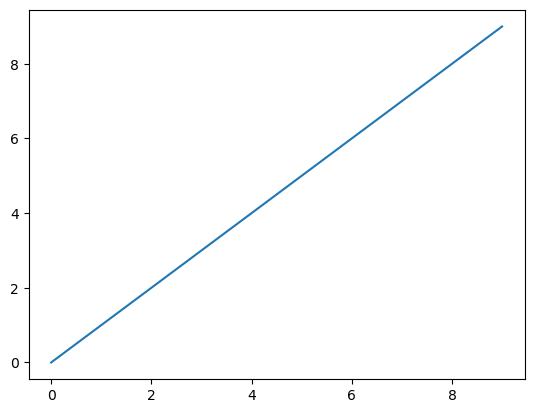

In [5]:
#package imports
#If using Jupyter locally, make sure you have pip installed saphires and any dependencies you need.
#You should have done this as part of our last lab
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg') #comment this line out if using colab
import numpy as np
import os
from scipy.optimize import curve_fit
#from matplotlib.backends.backend_pdf import PdfPages



%matplotlib inline
import pickle as pkl
from scipy.ndimage import gaussian_filter
import astropy
import saphires as saph #if using colab comment out this line.

x = [0,1,2,3,4,5,6,7,8,9]
y = x
plt.plot(x, y)    #Testing out matplotlib inline to make sure this runs
print()

In [5]:
# here are all the broadening function files
#!dir C:\Users\Jonah\Astro\Stars\coude_SSG_data\coude_SSG_data\TYC3557-919-1*.p /s

In [26]:
star = "ROTSE1J170537.88+335052.5"
import os
import glob

folder_path = 'C:/Users/Jonah/Astro/Stars/DATA/stars/' + star  # Change this to the path of your folder

file_pattern = os.path.join(folder_path, '*.p')  #Retrieve all .p files in the folder
p_files = glob.glob(file_pattern)
txtfiles = [os.path.basename(file) for file in p_files]  #Extract files into txtfile array
print(len(txtfiles))
for i in range(len(txtfiles) - 1, -1, -1):     #Ensure only files with the right first letter are in the array
    txtfiles[i] = str(txtfiles[i])
    if txtfiles[i].lower()[0] != star.lower()[0]:
        del txtfiles[i]

del txtfiles[4]    #Only if we need to brute force a file removal



for i in range(len(txtfiles)):
    print(txtfiles[i])
print(len(txtfiles))
#5-30

5
ROTSE1J170537.88+335052.5_2020-05-10_0.ls_4400_4.5.p
ROTSE1J170537.88+335052.5_2020-07-12_0.ls_4400_4.5.p
ROTSE1J170537.88+335052.5_2020-07-14_0.ls_4400_4.5.p
ROTSE1J170537.88+335052.5_2021-03-31_0.ls_4400_4.5.p
4


In [27]:
#.dat file extraction, checks .p

name = "_coude_head.dat"    
starpath = str(folder_path+"/"+star+name)    
print(starpath)

def is_float(string):
    #True if given string is float else False
    try:
        return float(string)
    except ValueError:
        return False

stardata = []
with open(starpath, 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split(",")
        stardata.append([float(i) if is_float(i) else i for i in k])
stardata = np.array(stardata, dtype='O')

print(stardata)
print(len(stardata))
'''
stardata = np.delete(stardata, [5])
print(stardata)
print(len(stardata))  #only for brute force file removal, in conjunction with above removal'''
#Need to remove both files to make sure rest of data is fine/lined up - remove from .p array, then remove from .dat array
print()


C:/Users/Jonah/Astro/Stars/DATA/stars/ROTSE1J170537.88+335052.5/ROTSE1J170537.88+335052.5_coude_head.dat
[list(['#Name', 'Tele', 'DATE-OBS', 'EXPTIME', 'BJD', 'BVCORR'])
 list(['ROTSE1J170537.88+335052.5_2020-05-10_0.pkl', 'mcdonald', '2020-05-10T08:59:54.850', '0', 1500.0, 2458979.8787778714, 5.615])
 list(['ROTSE1J170537.88+335052.5_2020-07-12_0.pkl', 'mcdonald', '2020-07-12T07:54:37.540', 1.0, 1500.0, 2459042.8328584204, -10.938])
 list(['ROTSE1J170537.88+335052.5_2020-07-14_0.pkl', 'mcdonald', '2020-07-14T05:39:05.250', 2.0, 1500.0, 2459044.738665924, -11.178])
 list(['ROTSE1J170537.88+335052.5_2021-03-31_0.pkl', 'mcdonald', '2021-03-31T09:37:59.950', 3.0, 1500.0, 2459304.9038404245, 14.401])]
5



In [28]:
#Constants
R_coude = 60000.0     #spectral resolution of the Coude.
c = (2.9979245*10**5)


In [29]:
#change the file path and filename to read in your broadening function file
path= folder_path+"/"
#A barycentric correction corrects for differences in the Earth's position with respect to the
#barycenter of the Solar System.

print(len(stardata))
print(len(txtfiles))
for i in range (len(stardata)-1):  #Prints out each .p along with date and BVCORR, which honestly could become its own array and help simplify later 
  BJD = stardata[i+1][5]           # -> didn't really consider that tho so this is just a check
  BVCORR = stardata[i+1][6]
  print(txtfiles[i], BJD, BVCORR)


#read in the pickle and smooth the broadening function to instrumental resolution


5
4
ROTSE1J170537.88+335052.5_2020-05-10_0.ls_4400_4.5.p 2458979.8787778714 5.615
ROTSE1J170537.88+335052.5_2020-07-12_0.ls_4400_4.5.p 2459042.8328584204 -10.938
ROTSE1J170537.88+335052.5_2020-07-14_0.ls_4400_4.5.p 2459044.738665924 -11.178
ROTSE1J170537.88+335052.5_2021-03-31_0.ls_4400_4.5.p 2459304.9038404245 14.401


File 1
ROTSE1J170537.88+335052.5_2020-05-10_0.ls_4400_4.5.p
Amplitude: 0.00826
RV: -38.0
Sigma: 7.414665225873279
Automated guesses: [0.058260000000000006, -38.0, 37.41466522587328, 0]


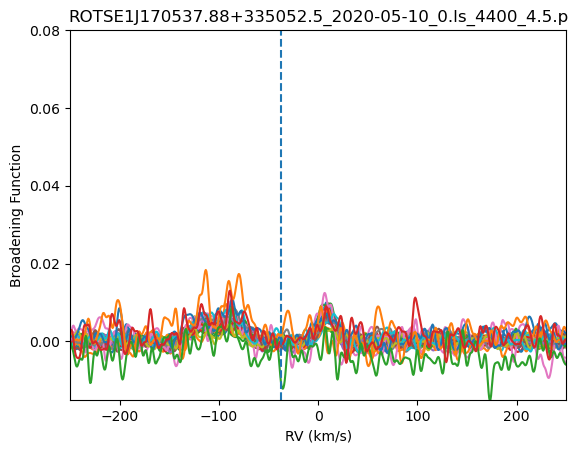

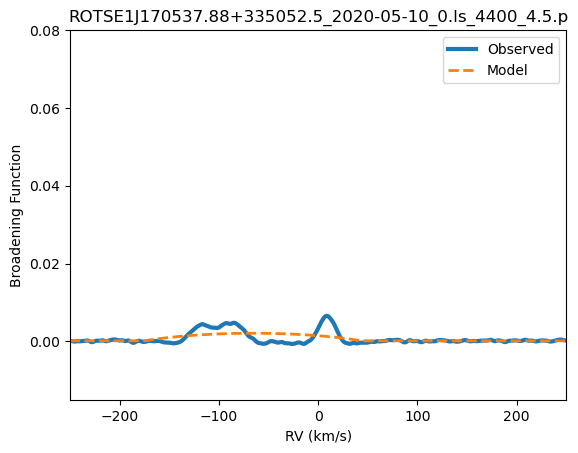

RV (uncorrected): -99.79 + 0.45 - 0.47
RV (barycenter corrected): -94.17 + 0.45 - 0.47
vsini: 106.98 +/- 4.26 km/s
Redshift: -0.00031411731683036044
------------------------------------------------------------


File 2
ROTSE1J170537.88+335052.5_2020-07-12_0.ls_4400_4.5.p
Amplitude: 0.0102
RV: -25.0
Sigma: 44.923109300562274
Automated guesses: [0.060200000000000004, -25.0, 74.92310930056227, 0]


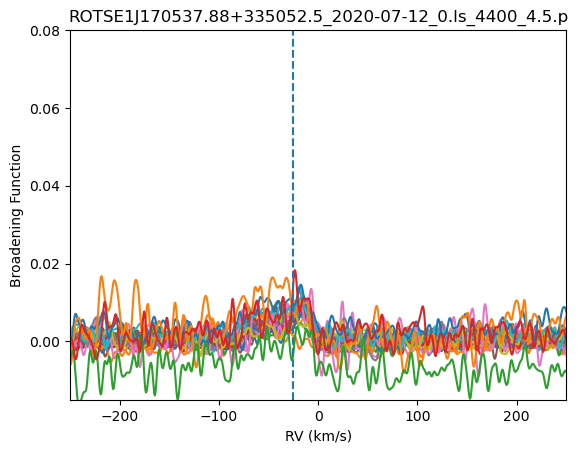

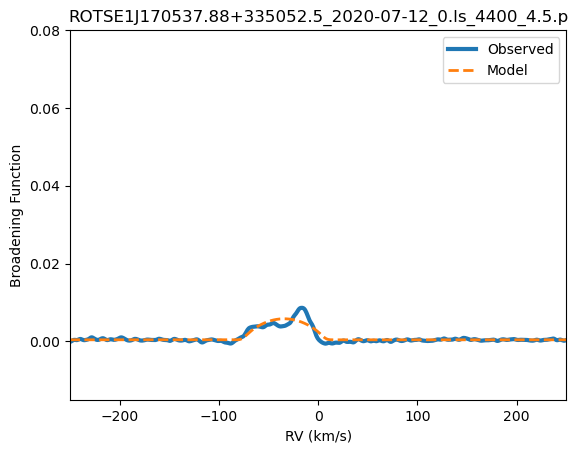

RV (uncorrected): -30.19 + 1.5 - 1.17
RV (barycenter corrected): -41.13 + 1.5 - 1.17
vsini: 41.38 +/- 0.55 km/s
Redshift: -0.00013719491601606377
------------------------------------------------------------


File 3
ROTSE1J170537.88+335052.5_2020-07-14_0.ls_4400_4.5.p
Amplitude: 0.00776
RV: -35.0
Sigma: 11.328431838445013
Automated guesses: [0.057760000000000006, -35.0, 41.32843183844501, 0]


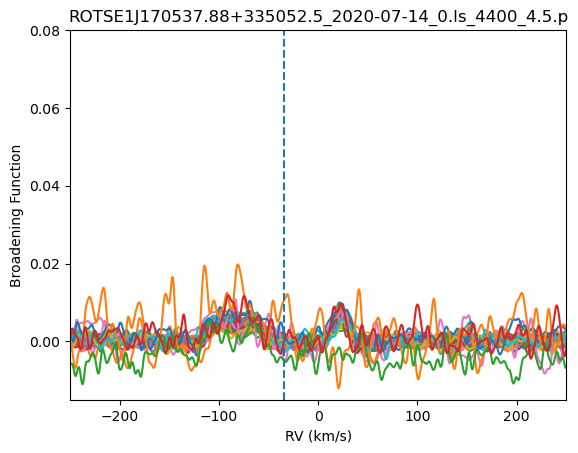

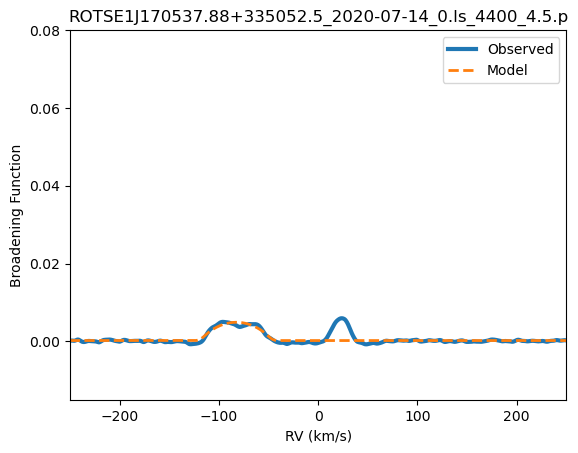

RV (uncorrected): -83.12 + 0.47 - 0.44
RV (barycenter corrected): -94.29 + 0.47 - 0.44
vsini: 35.65 +/- 0.91 km/s
Redshift: -0.0003145175937552797
------------------------------------------------------------


File 4
ROTSE1J170537.88+335052.5_2021-03-31_0.ls_4400_4.5.p
Amplitude: 0.00818
RV: -53.0
Sigma: 28.71409936124727
Automated guesses: [0.05818, -53.0, 58.71409936124727, 0]


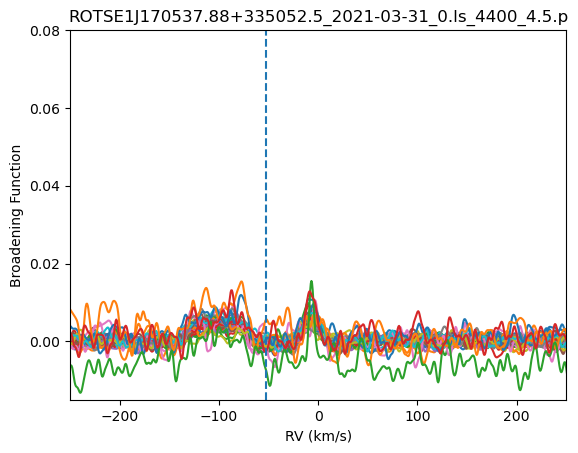

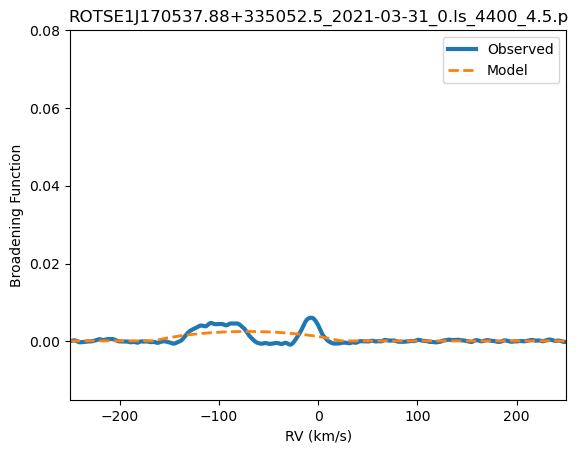

RV (uncorrected): -100.34 + 0.44 - 0.39
RV (barycenter corrected): -85.95 + 0.44 - 0.39
vsini: 92.3 +/- 3.11 km/s
Redshift: -0.0002866983474733937
------------------------------------------------------------




In [30]:
#plot all of the .p files with a loop of the array



'''p0g = [(0.01, -75, 150, 0),      #only if we want to manually input guesses - will have to change p0 = pog to p0=p0g[k]
      (0.01, -90, 150, 0),
      (0.01, -100, 150, 0),
      (0.007, -25, 150, 0),
      (0.0075, 0, 150, 0),
      (0.01, 75, 150, 0),
      (0.01, -25, 175, 0),
      (0.007, -25, 175, 0),
      (0.01, -50, 150, 0),
      (0.01, -65, 150, 0),
      (0.01, 85, 150, 0),
      (0.01, -25, 20, 0),
      (0, 0, 0, 0),
      (0, 0, 0, 0)]'''



RVuncor = [[] for i in range (len(txtfiles))]    #Create Array for RV uncorrected values
RVcor = [[] for i in range (len(txtfiles))]      #Create Array for RV corrected values
VSinis = [[] for i in range (len(txtfiles))]     #create Array for Vsinis
rshift = [[] for i in range (len(txtfiles))]

for k in range (len(txtfiles)):
  print("File", k+1)
  filename = txtfiles[k]    #re-initialize a new filename
  filepath= path+filename

    
  #read in the pickle and smooth the broadening function to instrumental resolution
  tar,tar_spec = pkl.load(open(filepath,'rb'))
  tar_spec = saph.bf.analysis(tar,tar_spec,R = R_coude)

  print(filename)
########################
    #Determine Max and guess values
  maxbf = []
  jval = []
  bff = []
  for j in range(tar.size):
    max = np.max(tar_spec[tar[j]]['bf_smooth'])
    maxbf.append(max)
    ind = 0
    for l in range(len(tar_spec[tar[j]]['bf_smooth'])):
      if tar_spec[tar[j]]['bf_smooth'][l] == max:
        ind = l
    jval.append(ind)
    bff.append(tar_spec[tar[j]]['bf_smooth'][ind])

  jvalmean = int(np.round(np.mean(jval)))   #mean RV index value (for peak)
  bffmean = np.round(np.mean(bff), 5)   #mean BF peak

  rvs = []
  for f in range(tar.size):
    rvs.append(tar_spec[tar[f]]['vel'][jvalmean])   #guesses each best RV value    
    #rvs.append(tar_spec[tar[j]]['vel'][ind])    #NOTE: i ran most of the values with j instead of f here, so may pose problems later
                                                      #if running into problems try commenting out the one with f and letting one with j run

  rvsmean = np.round(np.mean(rvs))   #mean RV location (for peak)

  print("Amplitude:", bffmean) #Amplitude guess
  print("RV:", rvsmean)  #RV guess


    #Find Diff/width
  i1 = 0
  i2 = 0

  start = []
  end = []
  rvst = []
  rved = []

  threshold = 0.01
  
  for j in range(tar.size):
    for l in range(len(tar_spec[tar[j]]['bf_smooth'])):
      if tar_spec[tar[j]]['vel'][l] > -150 and tar_spec[tar[j]]['bf_smooth'][l] > threshold:   #BF must be greater than a certain amplitude, 0.15-0.2 usually works
        i1 = l-10
        i2 = i1 + 20
        start.append(i1)
        rvst.append(tar_spec[tar[j]]['vel'][l] )
        break      #once first point that signifies a peak is found, break the loop

  for j in range (tar.size):
    for q in range((len(tar_spec[tar[j]]['bf_smooth'])-i2)):
      if tar_spec[tar[j]]['vel'][q] < 150 and tar_spec[tar[j]]['bf_smooth'][q+i2] < threshold:  #Find second instance where amplitude crosses threshold
        i2 = q+i2
        end.append(i2)
        rved.append(tar_spec[tar[j]]['vel'][q+i2] )
        break   #once second point is found, now have two arrays for lower width range

  RVST = np.mean(rvst)  #RV width start (mean)
  RVED = np.mean(rved)  #RV width end (mean)
  DIFF = np.abs(RVED-RVST)  #difference between two

  print("Sigma:", DIFF)

  if rvsmean < -175 or rvsmean > 175:   #sometimes code will just register first or last index, so I set to 0 as a temp fix
      rvsmean = 0
      
  #DIFF = 0  #only if DIFF needs to be manually changed, keep commented out otherwise
  offset = 0    #offset is almost always zero for BF Files

    #Key guess:
  pog = [bffmean+0.05, rvsmean, DIFF + 30, offset]    
    #BF peak usually can be overestimated (add 0.05 - 0.1)
    #rvsmean provides peak RV value, usually doesnt need to be corrected
    #DIFF is ok to overestimate, doesn't always work when underestimated. Also based off of beginning of peak so needs some addtion (+20-30)
    #Offset is normally zero
  print("Automated guesses:", pog)


  #print("My guesses:", p0g[k])     #only if using manual inputs (quoted out array from above - can just input guesses manually, and have to make p0=p0g[k]

############################
        #initialize guesses and BJD, BVCORR for file (remember, this is still just one .p file at a time)
  p0 = pog
  BJD = stardata[k+1][5]
  BVCORR = stardata[k+1][6]

  #Plots raw broadening func
  fig,ax = plt.subplots(1)
  for i in range(tar.size):
    ax.plot(tar_spec[tar[i]]['vel'],tar_spec[tar[i]]['bf_smooth'])
  ax.set_title(str(filename))
  ax.set_xlabel('RV (km/s)')
  ax.set_ylabel('Broadening Function')
  ax.axvline(rvsmean, ls='--')
  plt.xlim(-250, 250)
  plt.ylim(-0.015, 0.08)
  plt.show()

#did not change much here, normal RV creation
    
  vel,bf,bf_sterr,bf_wstd = saph.bf.weight_combine(tar,tar_spec,vel_gt_lt=(+150,-150))

  n_boot = 500 #number of bootstrap interations to perform
  rv_boot_dist = np.zeros(n_boot) #a blank array of RV values to fill
  bf_boot_dist = np.zeros([n_boot,tar_spec[tar[0]]['vel'].size]) #an array to save the BFs we create
  for i in range(n_boot):
      rindwr = np.random.randint(0,tar.size,tar.size) #randomly sample the contributing orders with replacement.
      tar_i = tar[rindwr] #pick out the selected orders
      vel_i,bf_i,bf_ste_i,bf_wstd_i = saph.bf.weight_combine(tar_i,tar_spec,vel_gt_lt=(+150,-150)) #create a version of the combined BF
      fit_i = (curve_fit(saph.utils.gaussian_off,vel_i,bf_i,p0=p0))[0] #fit it
      rv_boot_dist[i] = fit_i[1] #save the RV
      bf_boot_dist[i,:] = bf_i


  rv_boot_16,rv_boot_med,rv_boot_84 = np.percentile(rv_boot_dist,[16,50,84])
  rv_booterr_lo = rv_boot_med - rv_boot_16
  rv_booterr_hi = rv_boot_84 - rv_boot_med

  ### Last step, convert to barcentric RV. This has already been computed and is in the starname_coude_head.dat file.
  brv_boot = (rv_boot_med) + BVCORR + ((rv_boot_med) * BVCORR / c)

  ### Last step, convert to barcentric RV. This has already been computed and is in the starname_coude_head.dat file.

######
    #adds RV uncorrceted and corrected values to appropriate arrays
  RVuncor[k].extend([np.round(rv_boot_med,2), np.round(rv_booterr_hi,2), -np.round(rv_booterr_lo,2)])
  RVcor[k].extend([np.round(brv_boot,2), np.round(rv_booterr_hi,2), -np.round(rv_booterr_lo,2)])

######
    
  #this function creates the rotationally broadened line profile function for a given set of additonal broadening sources.
  print()
  ###
  #You don't need to change anything here
  def make_rot_pro(R,micro_turb,macro_turb,R_smooth,R_syn):
      '''
      A function to make a specific rotationally broadened fitting
      function for a given spectral resolution.
      '''

      if R >0:
          FWHM = (2.997924*10**5)/R
          sig_R = FWHM/(2.0*np.sqrt(2.0*np.log(2.0)))
      else:
          sig_R = 0

      if R_smooth > 0:
          FWHM_Rs = (2.997924*10**5)/R_smooth
          sig_Rs = FWHM_Rs/(2.0*np.sqrt(2.0*np.log(2.0)))
      else:
          sig_Rs = 0

      if R_syn > 0:
          FWHM_Rsyn = (2.997924*10**5)/R_syn
          sig_Rsyn = FWHM_Rsyn/(2.0*np.sqrt(2.0*np.log(2.0)))
      else:
          sig_Rsyn = 0

      sig = np.sqrt(sig_R**2 + sig_Rs**2 + micro_turb**2 + macro_turb**2 - sig_Rsyn**2)

      def rot_pro_ip(x,A,rv,rvw,o):
          '''
          Rotational line broadening function.

          To produce an actual line profile, you have to convolve this function
          with an acutal spectrum.

          In this form it can be fit directly to a the Broadening Fucntion.

          This is in velocity so uf you're going to convolve this with a spectrum make sure
          to take the appropriate cautions, whatever they may be.
          '''
          e = 0.75 # Limb-Darkening Coefficient

          c1 = (2*(1-e))/(np.pi*rvw*(1-e/3.0))
          c2 = e/(2*rvw*(1-e/3.0))

          prof=A*(c1*np.sqrt(1-((x-rv)/rvw)**2)+c2*(1-((x-rv)/rvw)**2))+o

          prof[np.isnan(prof)] = o

          v_spacing = x[1]-x[0]

          smooth_sigma = sig/v_spacing

          prof_conv=gaussian_filter(prof,sigma=smooth_sigma)

          return prof_conv

      return rot_pro_ip

  #then you will use curve_fit to fit a rotational broadening profile to the broadening function.
  #You should not need to change anything in this cell for different observations
  rot_prof = make_rot_pro(R_coude,0,0,R_coude,0)
  fit_rp,covar_rp = curve_fit(rot_prof,vel,bf,p0=p0)

  fig,ax = plt.subplots(1)

  ax.plot(vel,bf, label= "Observed", lw=3)
  ax.plot(vel,rot_prof(vel,*fit_rp), '--', lw= 2, label= "Model")
  plt.legend()
  ax.set_xlabel('RV (km/s)')
  ax.set_ylabel('Broadening Function')
  ax.set_title(str(filename))
  plt.xlim(-250, 250)
  plt.ylim(-0.015, 0.08)
  plt.show()
  #print the results of the above fit
  vsini1_lsfit = fit_rp[2]
  vsini1err_lsfit = np.sqrt(covar_rp[2,2]) #note we are taking the error on the vsini to be the sqrt of the diagonal term in the covariance matrix


####
    #Adds Vsini values to appropriate array
  VSinis[k].extend([np.abs(np.round(vsini1_lsfit,2)), np.round(vsini1err_lsfit,2)])
    
####

  print('RV (uncorrected):',np.round(rv_boot_med,2),'+',np.round(rv_booterr_hi,2),'-',np.round(rv_booterr_lo,2))
  print('RV (barycenter corrected):',np.round(brv_boot,2),'+',np.round(rv_booterr_hi,2),'-',np.round(rv_booterr_lo,2))
  #print('RV:',np.round(rv_boot_med,2),'+',np.round(rv_booterr_hi,2),'-',np.round(rv_booterr_lo,2), 'km/s')
  print('vsini:',np.round(vsini1_lsfit,2),'+/-',np.round(vsini1err_lsfit,2), 'km/s')
    
  z = RVcor[k][0] / c
  print("Redshift:", z )
  rshift[k].extend([z])
    
  print("------------------------------------------------------------")
  print()
  print()


In [19]:
#Print out corrected RV, and Vsini arrays

print("RV corrected:")
for i in range (len(RVcor)):
    print(RVcor[i])
print()


print("Vsinis:")
for i in range (len(VSinis)):
    print(VSinis[i])
print()

print("Redshifts:")
for i in range (len(rshift)):
    print(rshift[i], ",")
print()

Errors = [[] for i in range (len(RVcor))]
for i in range(len(RVcor)):
    Errors[i].extend([RVcor[i][1], np.abs(RVcor[i][2])])

for i in range(len(Errors)):
    print(Errors[i])

print()
Errors = np.array(Errors).T
for i in range(len(Errors)):
    print(Errors[i])

print()
print(len(RVcor))
print(len(VSinis))

RV corrected:
[-42.05, 0.1, -0.1]
[-89.62, 0.1, -0.11]
[-60.32, 0.1, -0.08]
[-34.49, 0.11, -0.08]

Vsinis:
[12.27, 0.06]
[12.89, 0.06]
[11.44, 0.05]
[12.29, 0.06]

Redshifts:
[-0.0001402637057737778] ,
[-0.0002989401500938399] ,
[-0.00020120586759272957] ,
[-0.00011504625950386676] ,

[0.1, 0.1]
[0.1, 0.11]
[0.1, 0.08]
[0.11, 0.08]

[0.1  0.1  0.1  0.11]
[0.1  0.11 0.08 0.08]

4
4


In [20]:
print("Final Values:")

finval = [[] for i in range (len(txtfiles) + 1)]
finval[0].extend(['Filename', 'BJD', 'BVCORR', 'RV', 'RV Upper Error', 'RV Lower Error', 'Vsini', 'Vsini Error', 'redshift'])

for i in range (len(finval)-1):
    finval[i+1].extend([txtfiles[i], stardata[i+1][5], stardata[i+1][6], RVcor[i][0], RVcor[i][1], RVcor[i][2], VSinis[i][0], VSinis[i][1], rshift[i][0]])

for i in range (len(finval)):
    print(finval[i])
    
print()

Final Values:
['Filename', 'BJD', 'BVCORR', 'RV', 'RV Upper Error', 'RV Lower Error', 'Vsini', 'Vsini Error', 'redshift']
['ROTSE1J162157.22+381733.6_2020-05-10_0.ls_4600_4.5.p', 2458979.849417526, 0.403, -42.05, 0.1, -0.1, 12.27, 0.06, -0.0001402637057737778]
['ROTSE1J162157.22+381733.6_2020-09-03_0.ls_4600_4.5.p', 2459095.63635056, -14.836, -89.62, 0.1, -0.11, 12.89, 0.06, -0.0002989401500938399]
['ROTSE1J162157.22+381733.6_2020-09-28_0.ls_4600_4.5.p', 2459120.596151779, -11.435, -60.32, 0.1, -0.08, 11.44, 0.05, -0.00020120586759272957]
['ROTSE1J162157.22+381733.6_2021-03-31_0.ls_4600_4.5.p', 2459304.855005104, 10.347, -34.49, 0.11, -0.08, 12.29, 0.06, -0.00011504625950386676]



4
4


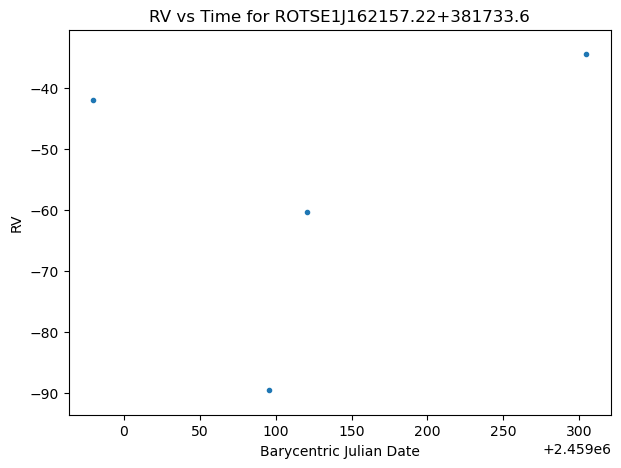


Avg RV value = -56.620000000000005
RV Standard Deviation = 21.24094983751904

Vsini Mean = 12.2225
Vsini Standard Deviation = 0.5159154484990737
Vsini Mean error = 0.25795772424953683

Mean Rshift =  -0.00018886399574105352

Final Values
['Filename', 'BJD', 'BVCORR', 'RV', 'RV Upper Error', 'RV Lower Error', 'Vsini', 'Vsini Error', 'redshift']
['ROTSE1J162157.22+381733.6_2020-05-10_0.ls_4600_4.5.p', 2458979.849417526, 0.403, -42.05, 0.1, -0.1, 12.27, 0.06, -0.0001402637057737778]
['ROTSE1J162157.22+381733.6_2020-09-03_0.ls_4600_4.5.p', 2459095.63635056, -14.836, -89.62, 0.1, -0.11, 12.89, 0.06, -0.0002989401500938399]
['ROTSE1J162157.22+381733.6_2020-09-28_0.ls_4600_4.5.p', 2459120.596151779, -11.435, -60.32, 0.1, -0.08, 11.44, 0.05, -0.00020120586759272957]
['ROTSE1J162157.22+381733.6_2021-03-31_0.ls_4600_4.5.p', 2459304.855005104, 10.347, -34.49, 0.11, -0.08, 12.29, 0.06, -0.00011504625950386676]



In [21]:


BJDtime = []
RVs = []
VSin = []
for i in range (len(txtfiles)):
  BJDtime.append(stardata[i+1][5])    #Create BJD array
for i in range (len(RVcor)):
  RVs.append(RVcor[i][0])
for i in range(len(VSinis)):
  VSin.append(VSinis[i][0])


print(len(RVcor))   #Ensure RV and BJD are same length
print(len(BJDtime))



#plt.scatter(BJDtime, RVs, fmt = '.')
#plt.plot(BJDtime, RVs)
fig,ax = plt.subplots(figsize = (7,5))
plt.errorbar(BJDtime, RVs, yerr = Errors, fmt = '.', ecolor = 'red') #Could eventually do something with the errors too, because the arrays have those
plt.xlabel('Barycentric Julian Date')
plt.ylabel('RV')
plt.title('RV vs Time for ' + star)
plt.ylim(np.min(RVs) - 4, np.max(RVs)+4)   #Expand plot limits if needed
plt.show()



print()
RVMean = np.mean(RVs)
print("Avg RV value =", RVMean)
RVSTD = np.std(RVs)
print("RV Standard Deviation =", RVSTD)

print()
VsinMean = np.mean(VSin)
print("Vsini Mean =", VsinMean)
VsiniSTD = np.std(VSin)
print("Vsini Standard Deviation =", VsiniSTD)
MeanErr = (VsiniSTD/np.sqrt(len(VSin)))
print("Vsini Mean error =", MeanErr)

print()
rshiftmean = np.mean(rshift)
print("Mean Rshift = ", rshiftmean)

print()
print("Final Values")
for i in range (len(finval)):
    print(finval[i])
    
print()

In [22]:
#DO NOT RUN UNTIL CONFIDENT IN ANSWERS
#DO NOT RUN UNTIL CONFIDENT IN ANSWERS
#DO NOT RUN UNTIL CONFIDENT IN ANSWERS
#DO NOT RUN UNTIL CONFIDENT IN ANSWERS
#DO NOT RUN UNTIL CONFIDENT IN ANSWERS

In [23]:
#DO NOT RUN UNTIL CONFIDENT IN ANSWERS
#Creates / adds to a .txt file with the star name

filetxt = star + ".txt"
RV = RVMean
RVSTD = RVSTD
Vsini = VsinMean
VsiniSTD = VsiniSTD
print(filetxt)
with open(filetxt, "a") as file:
    file.write(star + "\n")
    file.write("Avg RV: " + str(RV) + " km/s\n")
    file.write("RV STD: " + str(RVSTD) + " km/s\n")
    file.write("Vsini: " + str(Vsini) + " km/s\n")
    file.write("Vsini STD: " + str(VsiniSTD) + " km/s\n")

    for i in range(len(finval)):
        if i == len(finval)-1:
            file.write(str(finval[i]))
        else:
            file.write(str(finval[i]) + ",\n")
    file.write("\n\n")         
                       


ROTSE1J162157.22+381733.6.txt


In [765]:
#Adds to a .txt file with all stars

filetxt = "StarsDATA-3.txt"
print(filetxt)
with open(filetxt, "a") as file:
    file.write(star + "\n")
    file.write("Avg RV: " + str(RV) + " km/s\n")
    file.write("RV STD: " + str(RVSTD) + " km/s\n")
    file.write("Vsini: " + str(Vsini) + " km/s\n")
    file.write("Vsini STD: " + str(VsiniSTD) + " km/s\n")
    for i in range(len(finval)):
        if i == len(finval)-1:
            file.write(str(finval[i]))
        else:
            file.write(str(finval[i]) + ",\n")
    file.write("\n\n")         
                       

StarsDATA-3.txt
